<a href="https://colab.research.google.com/github/BalthazazarDuc/Data-Science-Machine-Learning/blob/Balt/Different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [4]:
!pip install nltk
!pip install spacy
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 34.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.svm import LinearSVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
train=pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/Data-Science-Machine-Learning/main/training_data.csv?token=GHSAT0AAAAAACOZ4C73W6RMSSTLRC7G5PO6ZQ77H5Q')
print(train.shape)


(4800, 3)


In [ ]:
test=pd.read_csv('https://raw.githubusercontent.com/BalthazazarDuc/Data-Science-Machine-Learning/main/unlabelled_test_data.csv?token=GHSAT0AAAAAACOZ4C73AOLJGUSBJSLVF63OZQ72D6A')
print(test.shape)

In [ ]:
train.head(2)


In [ ]:
test.head(2)


#Testing

In [8]:
corpus = train['sentence'].tolist()


In [9]:

# Using default tokenizer in TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Learn the vocabulary dictionary and return document-term matrix
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Visualize result in dataframe
df_tfidf

,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.200821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(train['difficulty'])
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)

##Classical Linear regression model

In [10]:
encoder = LabelEncoder()
y = encoder.fit_transform(train['difficulty'])
y

array([4, 0, 0, ..., 1, 5, 5])

In [11]:
#Split
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)

#train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#ppredict
y_pred = model.predict(X_test)

#evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.41875
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54       166
           1       0.41      0.41      0.41       158
           2       0.34      0.27      0.30       166
           3       0.35      0.37      0.36       153
           4       0.41      0.45      0.43       152
           5       0.46      0.47      0.47       165

    accuracy                           0.42       960
   macro avg       0.41      0.42      0.42       960
weighted avg       0.42      0.42      0.42       960



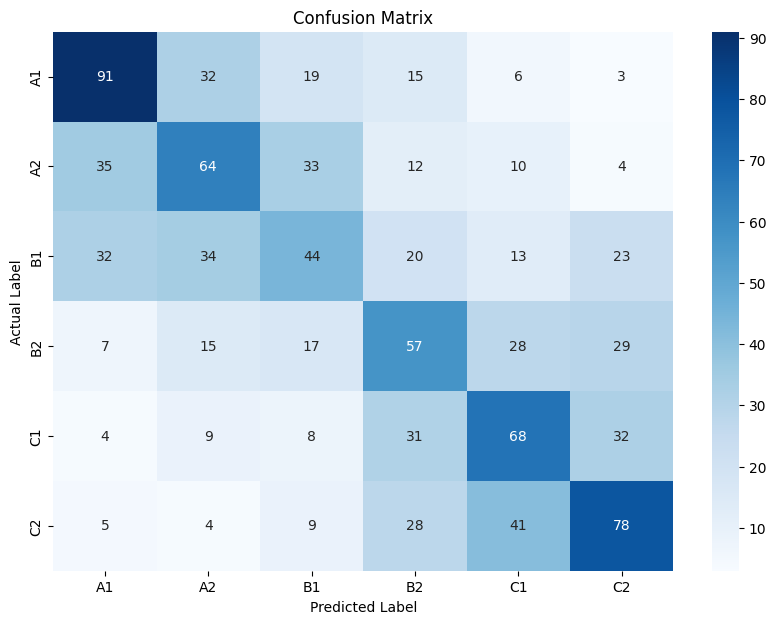

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

We see that our model manage well extrem value (A1, C2) but struggle with middle class

###Stopword removal (decrease accuracy)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
french_stop_words = stopwords.words('french')
vectorizer = TfidfVectorizer(stop_words=french_stop_words)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Lower accuracy not interessant

Accuracy: 0.41875
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54       166
           1       0.41      0.41      0.41       158
           2       0.34      0.27      0.30       166
           3       0.35      0.37      0.36       153
           4       0.41      0.45      0.43       152
           5       0.46      0.47      0.47       165

    accuracy                           0.42       960
   macro avg       0.41      0.42      0.42       960
weighted avg       0.42      0.42      0.42       960



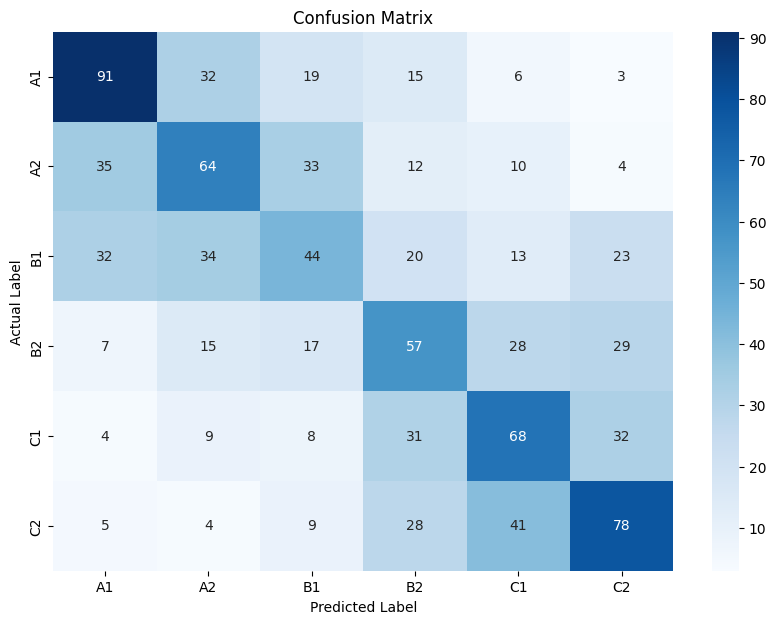

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###Use of bi-gram

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) #If you want bi or tri gram just change 2 by 3
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.44375
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.63      0.54       166
           1       0.34      0.29      0.32       158
           2       0.39      0.28      0.33       166
           3       0.46      0.41      0.43       153
           4       0.43      0.49      0.46       152
           5       0.51      0.56      0.54       165

    accuracy                           0.44       960
   macro avg       0.44      0.44      0.43       960
weighted avg       0.44      0.44      0.44       960



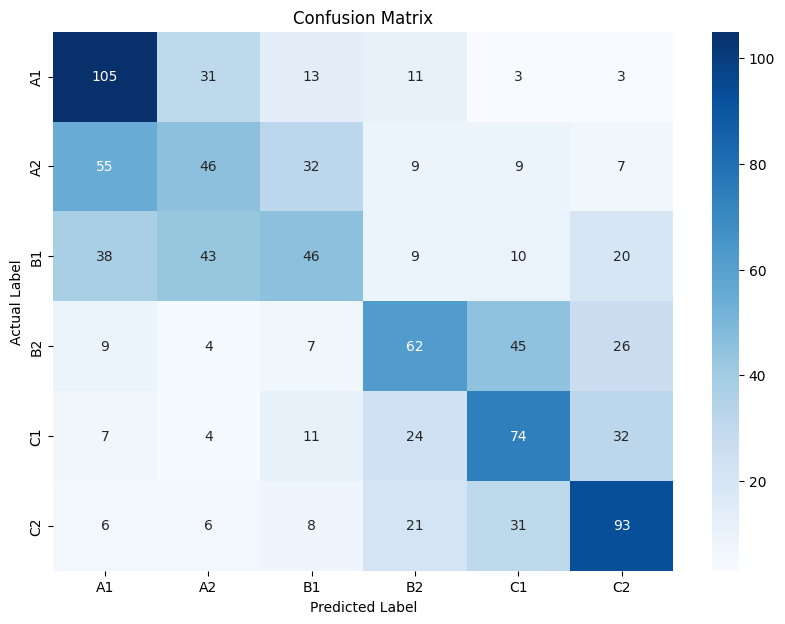

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

bi-gram accuracy is 0.44375 not a big change
//
tri-gram accuracy is 0.4364 not a big change either

---



###lemmatization

In [ ]:
# Load the French language model
nlp = spacy.load('fr_core_news_sm')

# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_punct])

# Apply lemmatization to each document in the corpus
lemmatized_corpus = [lemmatize_text(doc) for doc in corpus]

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(lemmatized_corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

Index(['000', '000 appel', '000 bougie', '000 classe', '000 et', '000 euro',
       '000 habitant', '000 langue', '000 locuteur', '000 réfugié',
       ...
       'île dessécher', 'île désert', 'île entière', 'île henderson', 'île le',
       'île pouvoir', 'île être', 'ôter', 'ôter de', 'ôter le'],
      dtype='object', length=55678)

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(train['difficulty'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4479166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57       166
           1       0.42      0.35      0.38       158
           2       0.39      0.30      0.34       166
           3       0.43      0.40      0.41       153
           4       0.42      0.47      0.45       152
           5       0.49      0.49      0.49       165

    accuracy                           0.45       960
   macro avg       0.44      0.45      0.44       960
weighted avg       0.44      0.45      0.44       960



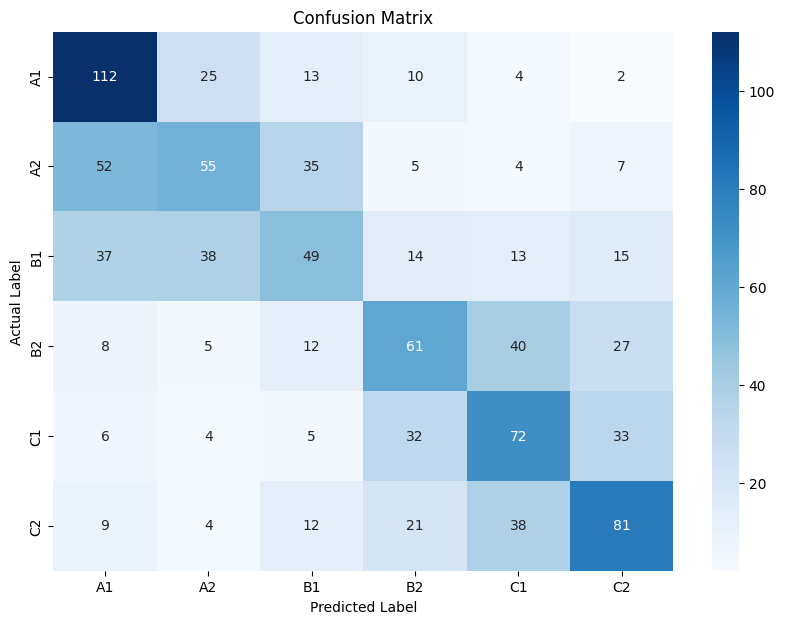

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

##Suport Vector Machine (SVM)

In [ ]:
#model = SVC(kernel='linear')  # 'linear' kernel is often a good choice for text classification

# Train the model
#model.fit(X_train, y_train)

##THIS TAKE TOO LONG

In [14]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [15]:
model.fit(X_train, y_train)

LinearSVC()

Accuracy: 0.453125
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56       166
           1       0.35      0.39      0.37       158
           2       0.42      0.30      0.35       166
           3       0.45      0.41      0.43       153
           4       0.44      0.45      0.44       152
           5       0.53      0.53      0.53       165

    accuracy                           0.45       960
   macro avg       0.45      0.45      0.45       960
weighted avg       0.45      0.45      0.45       960



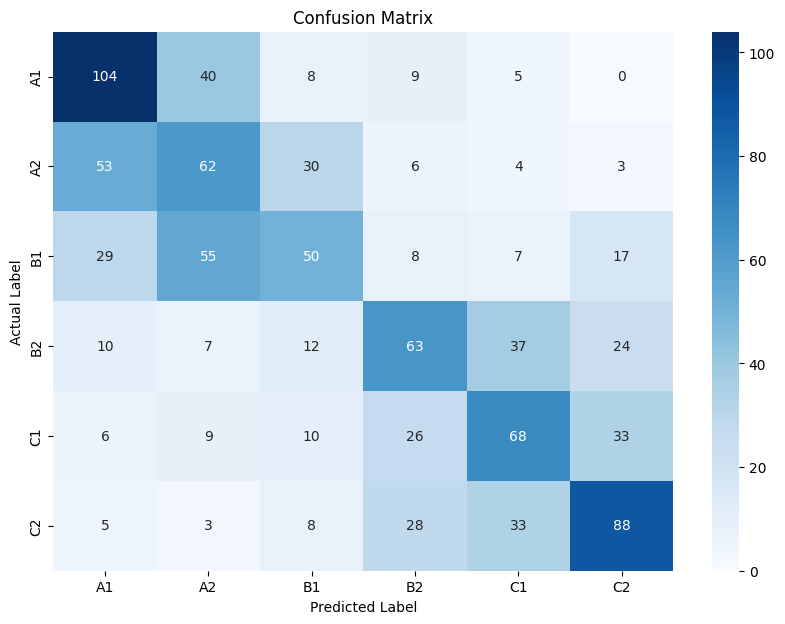

In [17]:
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()